In [62]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm
from math import comb
import math
import os
import json
from pathlib import Path
import pickle
from utils import StringArt, create_img_from_anchors
import importlib
import cv2

In [63]:
def display_images(image_list):
    num_images = len(image_list)
    
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 10, 10))
    
    for ax, img in zip(axes, image_list):
        ax.imshow(img.T, cmap="gray_r")
        ax.axis('off')  # Turn off axis numbers and ticks
    
    plt.figure(figsize=(20, 20))
    plt.tight_layout()
    plt.show()

In [64]:
NUM_ANCHORS = 288 #Number of anchors around the circle
LINE_DARKNESS = 0.2  #Brightness of the center of each line
IMG_PATH = "../data/face2.jpg"
NUM_LINES = 6000
IMG_SIZE = 1200
IMPORTANCE = 2


In [65]:
art = StringArt(image_path=IMG_PATH, num_anchors=NUM_ANCHORS, line_darkness=LINE_DARKNESS, num_lines=NUM_LINES)
art.img_size=IMG_SIZE
art.importance_map_multiplier = IMPORTANCE

In [66]:
art.preprocess_image(edge_low_threshold=20, edge_high_threshold=60, edge_gaussian_blur_size=11, edge_dialate_iterations=10)
art.create_anchors()
art.create_circle_mask()

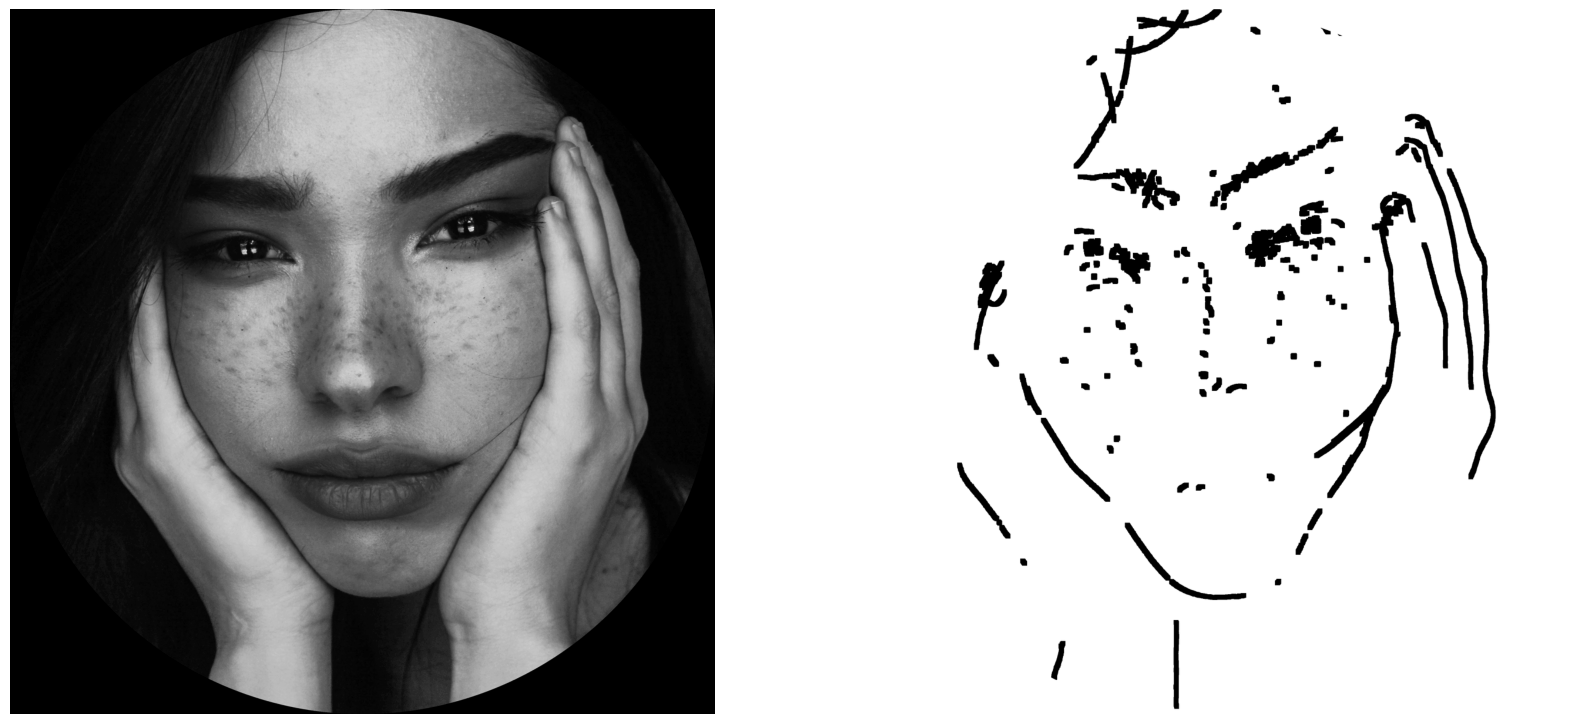

<Figure size 2000x2000 with 0 Axes>

In [67]:
display_images([art.img, art.importance_map])

In [68]:
art.benchmark_line_dict()

Starting benchmark for line dict
Done! Generated 288 anchor lines on a canvas of size of 1200 in 305.3 milliseconds. Estimated time for generating line dict is about 43.8 seconds


In [69]:
art.make_line_dict()

In [70]:
art.create_string_art_img()
art.create_difference_img()

In [71]:
art.benchmark_string_art()

Starting benchmark for string art
Done! Found the best line out of 287 anchors lines on a canvas of size of 1200x1200 in 32.4 milliseconds. Estimated time for finding all lines is 194.2 seconds


In [72]:
art.create_string_art()

Drawing Line: 100%|██████████| 6000/6000 [02:36<00:00, 38.40it/s]


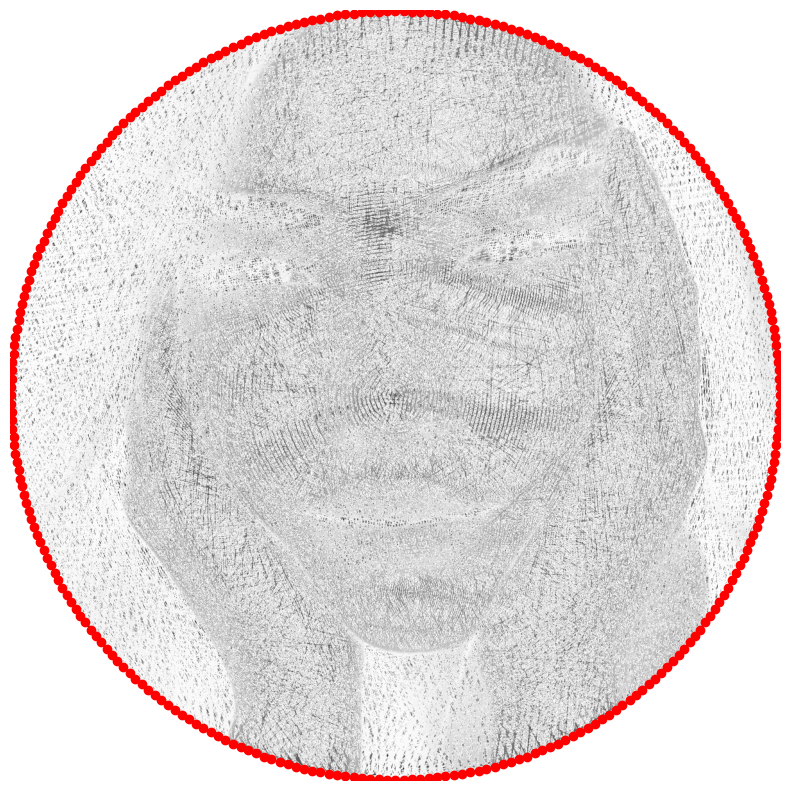

In [73]:
plt.figure(figsize=(10, 10))  
plt.imshow(art.difference_img.T, cmap='gray_r')
anchors_x, anchors_y = zip(*art.anchors)
plt.scatter(anchors_x, anchors_y, color='red')
plt.axis('off')
plt.show()

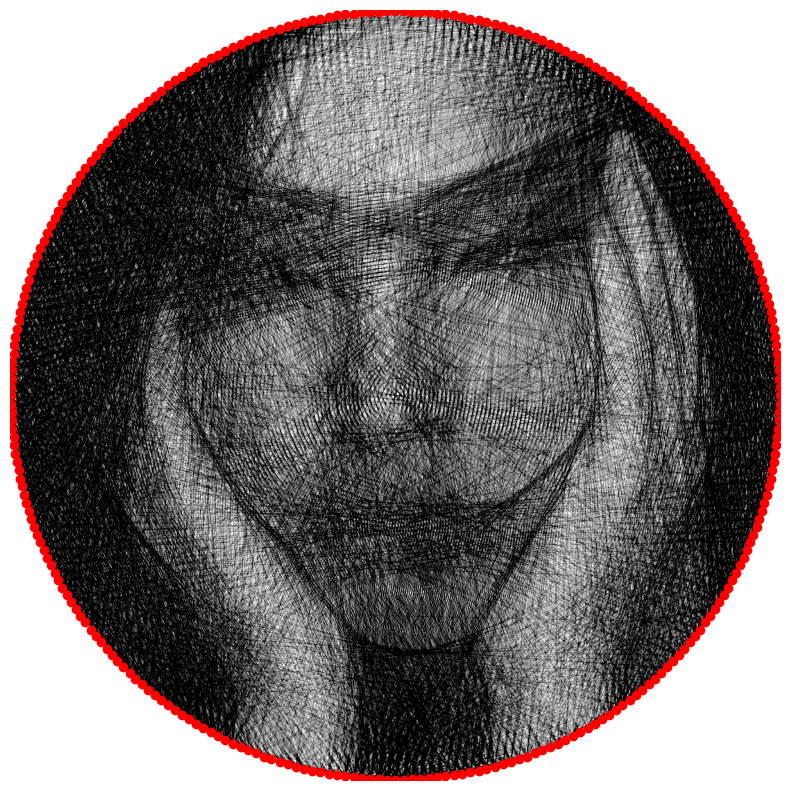

In [74]:
plt.figure(figsize=(10, 10))  
plt.imshow(art.string_art_img.T, cmap='gray_r', vmin=0, vmax=1)
anchors_x, anchors_y = zip(*art.anchors)
plt.scatter(anchors_x, anchors_y, color='red')
plt.axis('off')
plt.show()

In [75]:
save_dir = "../outputs/face2"

In [76]:
art.save_data(save_dir)

In [77]:
create_img_from_anchors(save_dir, [10, 20, 30, 40, 50, 60, 70, 80, 90])